In [1]:
import torch
import matplotlib.pyplot as plt

In [2]:
words=open('names.txt','r').read().splitlines()


In [8]:
chars=(list(set(''.join(words))))
print(chars)
stoi={s:i+1 for i,s in enumerate(chars)}
stoi['.']=0
print(stoi)


itos={i:s for s,i in stoi.items()}
print(itos)

{'u', 'w', 'r', 'e', 't', 'h', 'd', 'f', 'n', 'o', 'i', 'k', 'm', 'j', 'x', 'l', 'b', 's', 'c', 'p', 'g', 'q', 'z', 'y', 'v', 'a'}
['u', 'w', 'r', 'e', 't', 'h', 'd', 'f', 'n', 'o', 'i', 'k', 'm', 'j', 'x', 'l', 'b', 's', 'c', 'p', 'g', 'q', 'z', 'y', 'v', 'a']
{'u': 1, 'w': 2, 'r': 3, 'e': 4, 't': 5, 'h': 6, 'd': 7, 'f': 8, 'n': 9, 'o': 10, 'i': 11, 'k': 12, 'm': 13, 'j': 14, 'x': 15, 'l': 16, 'b': 17, 's': 18, 'c': 19, 'p': 20, 'g': 21, 'q': 22, 'z': 23, 'y': 24, 'v': 25, 'a': 26, '.': 0}
{1: 'u', 2: 'w', 3: 'r', 4: 'e', 5: 't', 6: 'h', 7: 'd', 8: 'f', 9: 'n', 10: 'o', 11: 'i', 12: 'k', 13: 'm', 14: 'j', 15: 'x', 16: 'l', 17: 'b', 18: 's', 19: 'c', 20: 'p', 21: 'g', 22: 'q', 23: 'z', 24: 'y', 25: 'v', 26: 'a', 0: '.'}


In [206]:
#create the train set all bigrams (x,y)

xs,ys=[],[]

for w in words[:1]:
    chs=['.'] + list(w) + ['.']
    for ch1,ch2 in zip(chs,chs[1:]):
        ix1=stoi[ch1]
        ix2=stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)

xs=torch.tensor(xs)
ys=torch.tensor(ys)

In [207]:
xs,ys

(tensor([ 0,  6, 19, 19,  2]), tensor([ 6, 19, 19,  2,  0]))

In [208]:
import torch.nn.functional as F

torch.Size([5, 27])
torch.Size([5, 27])
torch.float32


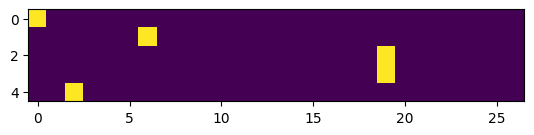

In [209]:
Xenc=F.one_hot(xs,num_classes=27).float()
yenc=F.one_hot(ys,num_classes=27)

print(Xenc.shape)
print(yenc.shape)
print(Xenc.dtype)
plt.imshow(Xenc)

In [210]:
# Example Matrix Multiplication
W=torch.randn((27,27))

(Xenc @ W)
# (5,27) * (27,1) = (5,1)

tensor([[-0.8326,  0.3096, -1.1333, -2.6611,  0.4248,  0.1295,  0.6513,  0.2090,
         -0.3359,  0.8825,  0.4246, -0.3021,  0.9402,  1.9511, -1.1221, -0.1889,
          0.4093,  0.5503,  1.0858,  2.2083, -0.6417,  0.5071,  0.2465,  1.6482,
          0.6120,  2.2739,  0.0708],
        [ 0.6144, -0.4925, -0.6751, -0.6284, -1.7264, -0.8004, -1.3254,  0.2146,
         -0.6013, -0.0709,  1.0101, -1.3193,  0.4369,  0.5600, -0.2217,  1.4075,
         -0.3330, -0.7979,  1.9307, -0.1861,  0.4330,  0.8769, -0.5894,  2.2420,
          2.6153,  0.6719, -0.3038],
        [ 1.2965,  2.0130,  0.3627, -0.0713,  0.2677,  0.9051, -1.7248, -1.8615,
          1.8012, -0.4092,  0.5193,  0.4123,  1.1448,  0.3674, -0.4539,  0.9960,
         -0.5514, -1.3231,  0.7652,  1.2804, -0.6412, -1.2192,  0.6931, -2.2012,
          1.1742,  0.4635,  0.3279],
        [ 1.2965,  2.0130,  0.3627, -0.0713,  0.2677,  0.9051, -1.7248, -1.8615,
          1.8012, -0.4092,  0.5193,  0.4123,  1.1448,  0.3674, -0.4539,  0.9960

In [211]:
(Xenc[3] @ W[:,13]).sum() ==(Xenc @ W)[3,13] 

tensor(True)

In [212]:
logits=(Xenc @ W)
counts=logits.exp()
probs=counts/counts.sum(1,keepdims=True)



In [213]:
print(probs[0].sum())
print(probs[0].shape)

tensor(1.0000)
torch.Size([27])


## Summary

In [214]:
xs

tensor([ 0,  6, 19, 19,  2])

In [215]:
ys

tensor([ 6, 19, 19,  2,  0])

In [216]:
#randomly initialize 27 neurons and each neuron receives 27 inputs
g=torch.Generator().manual_seed(2147483647)
W=torch.randn((27,27),generator=g)

In [217]:
#Forward pass
xenc=F.one_hot(xs,num_classes=27).float() # input the network:one hot encoding
logits=(xenc @ W) # predict log counts
counts=logits.exp() # counts, equivelant to N

probs=counts / counts.sum(1,keepdim=True) # probabilities for next character



In [219]:
nlls=torch.zeros(1)

for i in range(1):
    x=xs[i].item()
    y=ys[i].item()
    
    print('--------')
    print(f'Bigram example {i+1}:{itos[x]}{itos[y]} (indexes {x},{y})')
    print('input to the neural net:',x)
    print('label (actual next character)',y)
    p=probs[i,y]
    print('probability assigned by the net to the correct character:',p.item())
    logp=torch.log(p)
    print('log likelihood',logp.item())
    nll=-logp
    print('negative log likelihood',nll.item())
    nlls[i]=nll
    
print('==========')
print('average negative log likelihood i.e:loss=',nlls.mean().item())


--------
Bigram example 1:.e (indexes 0,6)
input to the neural net: 0
label (actual next character) 6
probability assigned by the net to the correct character: 0.0026941029354929924
log likelihood -5.916689872741699
negative log likelihood 5.916689872741699
average negative log likelihood i.e:loss= 5.916689872741699


In [220]:
# Loss fonksiyonu hesabı için olasıkları istiyoruz ama alttaki gibi zor yoldan değil

probs[0,5],probs[1,13],probs[2,13],probs[3,1],probs[4,0]

(tensor(0.0123, grad_fn=<SelectBackward0>),
 tensor(0.0115, grad_fn=<SelectBackward0>),
 tensor(0.0287, grad_fn=<SelectBackward0>),
 tensor(0.0121, grad_fn=<SelectBackward0>),
 tensor(0.0249, grad_fn=<SelectBackward0>))

## Optimization

In [243]:
xs

tensor([ 0,  6, 19, 19,  2])

In [244]:
ys

tensor([ 6, 19, 19,  2,  0])

In [245]:
#randomly initialize 27 neurons and each neuron receives 27 inputs

g=torch.Generator().manual_seed(2147483647)
W=torch.randn(27,27,generator=g,requires_grad=True)

In [254]:
#Forward pass
xenc=F.one_hot(xs,num_classes=27).float() # input the network:one hot encoding
logits=(xenc @ W) # predict log counts
counts=logits.exp() # counts, equivelant to N

probs=counts / counts.sum(1,keepdim=True) # probabilities for next character

loss=-probs[torch.arange(5),ys].log().mean()



In [255]:
print(loss.item())

4.634944915771484


In [256]:
#Backward Pass
W.grad=None
loss.backward()

In [257]:
#Update Weights
W.data+=-0.1 * W.grad

# --------- !!! OPTIMIZATION !!! yay, but this time actually --------------


In [264]:
# create the dataset
xs, ys = [], []
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    xs.append(ix1)
    ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ', num)

# initialize the 'network'
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

number of examples:  228146


In [270]:
# gradient descent
for k in range(10):
  
  # forward pass
  xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
  logits = xenc @ W # predict log-counts
  counts = logits.exp() # counts, equivalent to N
  probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
  loss = -probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean()
  print(loss.item())
  
  # backward pass
  W.grad = None # set to zero the gradient
  loss.backward()
  
  # update
  W.data += -50 * W.grad

2.6807148456573486
2.6636157035827637
2.648829221725464
2.63590145111084
2.6245028972625732
2.614387035369873
2.6053595542907715
2.5972673892974854
2.589984655380249
2.583407163619995


In [269]:
# finally, sample from the 'neural net' model
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
  
  out = []
  ix = 0
  while True:
    
    # ----------
    # BEFORE:
    #p = P[ix]
    # ----------
    # NOW:
    xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
    logits = xenc @ W # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    p = counts / counts.sum(1, keepdims=True) # probabilities for next character
    # ----------
    
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

jana.
kahtuscenadbin.
gh.
adoifma.
jlelyuteri.
